In [1]:
# Import related libraries for NLP
import re
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import random
from PIL import Image
import matplotlib.pyplot as plt
from autocorrect import spell

In [3]:
# Not truncating the text
%matplotlib inline
pd.options.display.max_colwidth = -1 #does not truncate text

## Data Preprocessing

In [4]:
# Reading file path and file name
data_dir = 'C:/Users/Brajesh Ranjan/Desktop/Data Science/Datasets/Text Mining/'
file_name = 'demo.csv'

In [5]:
# Complete file path with latin1 encoding
input_df = pd.read_csv(data_dir + file_name,encoding = 'latin1')

In [6]:
tweets_df = input_df[['text']] #Create data frame for text column in data set
tweets_df.columns = ['tweets'] #Creating list 'tweets' from the data set

In [8]:
tweets_df.head() #Showing first 5 rows of the tweets column

,tweets
0,RT @rssurjewala: Critical question: Was PayTM informed about #Demonetization edict by PM? It's clearly fishy and requires full disclosure &amp;
1,RT @Hemant_80: Did you vote on #Demonetization on Modi survey app?
2,"RT @roshankar: Former FinSec, RBI Dy Governor, CBDT Chair + Harvard Professor lambaste #Demonetization.\r\n\r\nIf not for Aam Aadmi, listen to th"
3,RT @ANI_news: Gurugram (Haryana): Post office employees provide cash exchange to patients in hospitals #demonetization https://t.co/uGMxUP9
4,RT @satishacharya: Reddy Wedding! @mail_today cartoon #demonetization #ReddyWedding https://t.co/u7gLNrq31F


## Remove URLs, RTs and Twitter Handles

In [9]:
# Creating function for removing http, @, <, RT from the tweet texts
def remove_urls(input_text):
    tokens = input_text.split()
    clean_tokens = [word for word in tokens
                   if 'http' not in word and
                   '@' not in word and 
                   '<' not in word and 
                   'RT' not in word]
    return ' '.join(clean_tokens)

#.join example
string1 = "I Love Python"
string_lst = string1.split()'_'.join string_lst

In [13]:
tweets_df['tweets'] = tweets_df['tweets'].apply(remove_urls)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
tweets_df.head()

,tweets
0,Critical question: Was PayTM informed about #Demonetization edict by PM? It's clearly fishy and requires full disclosure &amp;
1,Did you vote on #Demonetization on Modi survey app?
2,"Former FinSec, RBI Dy Governor, CBDT Chair + Harvard Professor lambaste #Demonetization. If not for Aam Aadmi, listen to th"
3,Gurugram (Haryana): Post office employees provide cash exchange to patients in hospitals #demonetization
4,Reddy Wedding! cartoon #demonetization #ReddyWedding


## Convert Case

In [15]:
# Function to convert all texts into lower case
def convert_case(input_text):
    split = input_text.split(' ')
    lower = [text.lower() for text in split] 
    output = ' '.join(lower)
    return output

In [16]:
tweets_df['tweets'] = tweets_df['tweets'].apply(convert_case)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
tweets_df.head()

,tweets
0,critical question: was paytm informed about #demonetization edict by pm? it's clearly fishy and requires full disclosure &amp;
1,did you vote on #demonetization on modi survey app?
2,"former finsec, rbi dy governor, cbdt chair + harvard professor lambaste #demonetization. if not for aam aadmi, listen to th"
3,gurugram (haryana): post office employees provide cash exchange to patients in hospitals #demonetization
4,reddy wedding! cartoon #demonetization #reddywedding


## Clear Punctuations

In [18]:
# Clearing punctuation bys replacing.....
#** Check for str.replace('[^\w\s]','')
tweets_df['tweets'] = tweets_df['tweets'].str.replace('[^\w\s]','')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
tweets_df.head()

,tweets
0,critical question was paytm informed about demonetization edict by pm its clearly fishy and requires full disclosure amp
1,did you vote on demonetization on modi survey app
2,former finsec rbi dy governor cbdt chair harvard professor lambaste demonetization if not for aam aadmi listen to th
3,gurugram haryana post office employees provide cash exchange to patients in hospitals demonetization
4,reddy wedding cartoon demonetization reddywedding


## Remove Stopwords

In [20]:
def remove_stop_words(input_text):
    stopword_list = set(stopwords.words('english'))
    stopword_list.add("https")
    stopword_list.add("00A0")
    stopword_list.add("00BD")
    stopword_list.add("00B8")
    stopword_list.add("ed")
    stopword_list.add("demonetization")
    stopword_list.add("Demonetization co")
    stopword_list.add("narendramodi")
    stopword_list.add("modi")
    stopword_list.add("lakh")
    stopword_list.add("amp")
    stopword_list.add("jampk")
    stopword_list.add("narendra")
    stopword_list.add("thats")
    stopword_list.add("ads")
    stopword_list.add("8086")
    stopword_list.add("youtube")
    stopword_list.add("dear")
    tokens = input_text.split()
    stop_words_removed = [token for token in tokens if token not in stopword_list]
    return ' '.join(stop_words_removed)

In [21]:
tweets_df['tweets'] = tweets_df['tweets'].apply(remove_stop_words)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
tweets_df.head()

,tweets
0,critical question paytm informed edict pm clearly fishy requires full disclosure
1,vote survey app
2,former finsec rbi dy governor cbdt chair harvard professor lambaste aam aadmi listen th
3,gurugram haryana post office employees provide cash exchange patients hospitals
4,reddy wedding cartoon reddywedding


## Keep Alpha Numerics

In [23]:
#Function to keep alpha numeric
tweets_df['tweets'] = tweets_df['tweets'].apply(lambda x : re.sub('[^A-Za-z0-9]',' ', x))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
tweets_df.head()

,tweets
0,critical question paytm informed edict pm clearly fishy requires full disclosure
1,vote survey app
2,former finsec rbi dy governor cbdt chair harvard professor lambaste aam aadmi listen th
3,gurugram haryana post office employees provide cash exchange patients hospitals
4,reddy wedding cartoon reddywedding


## Remove Words of smaller length

In [25]:
#Function to remove words with length <= 3
def remove_small_words(input_text):
    tokens = input_text.split()
    cleaned_tokens = [token for token in tokens if len(token) >= 3]
    return ' '.join(cleaned_tokens)

In [26]:
tweets_df['tweets'] = tweets_df['tweets'].apply(remove_small_words)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Lammatization(convert the word to its root word)

In [27]:
#Function for lemmatization
lemmatizer = WordNetLemmatizer()

def lemmatize(input_text):
    tokens = input_text.split()
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmas)

tweets_df['lemmas'] = tweets_df['tweets'].apply(lemmatize)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [28]:
tweets_df[['lemmas']].head(10)

,lemmas
0,critical question paytm informed edict clearly fishy requires full disclosure
1,vote survey app
2,former finsec rbi governor cbdt chair harvard professor lambaste aam aadmi listen
3,gurugram haryana post office employee provide cash exchange patient hospital
4,reddy wedding cartoon reddywedding
5,india blackmoney symptom disease via
6,looted bank kishtwar third incident since terrorist
7,calling nationalist join walk corruptionfreeindia spread benefit among ma
8,many opposition leader respect decisionbut support oppositio
9,national reform destroyed even essence sagan instance urge giving second though


## Term Frequency

In [29]:
#Getting term frequency
tf = tweets_df['tweets'].apply(lambda x: pd.value_counts(x.split(" ")))\
.sum(axis = 0)\
.reset_index()

In [30]:
tf.columns = ['words','tf'] #Creating list of two clomns, word and term frequency

In [31]:
tf.head()

,words,tf
0,edict,289.0
1,question,507.0
2,critical,296.0
3,paytm,351.0
4,fishy,285.0


In [32]:
for i,word in enumerate(tf['words']):
    tf.loc[i,'idf'] = np.log(tweets_df.shape[0]/(len(tweets_df[tweets_df['tweets'].str.contains(word)])))

In [33]:
tf['tf_idf'] = tf['tf']*tf['idf'] #TF = TF*IDF.

In [34]:
top_words = tf.sort_values('tf_idf',ascending = False)[0:200] #Getting top 200 words

In [35]:
top_words.head()

,words,tf,idf,tf_idf
316,india,2771.0,1.447857,4012.010372
615,rich,1509.0,2.305937,3479.659576
2075,find,1422.0,2.319460,3298.272522
2186,actually,1374.0,2.386316,3278.798165
3489,implement,1399.0,2.307954,3228.827973


## Creating Word Cloud

In [36]:
#Creating Word Cloud
words = list(top_words['words'])
score = list(top_words['tf_idf'])
top_tuples = list(zip(words,score))

d = {} #creating empty dictionary

for word,score in top_tuples:
    d[word] = score

wc = WordCloud(background_color = 'white',max_font_size = 200,height = 2000,width=2000,colormap='Spectral')
wc.fit_words(d)

<IPython.core.display.Javascript object>


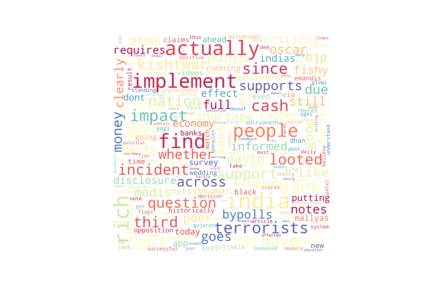

In [37]:
%matplotlib notebook
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")
wc.to_file("first_review.png")

## Getting and Clearing Noun phrases

In [39]:
from textblob import TextBlob

In [40]:
def get_noun_phrases(input_text):
    blob = TextBlob(input_text)
    np = list(blob.noun_phrases)
    return np

tweets_df['noun_phrases'] = tweets_df['lemmas'].apply(get_noun_phrases)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [41]:
tweets_df['len'] = tweets_df['noun_phrases'].apply(lambda x : len(x))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
tweets_clean = tweets_df[tweets_df['len'] != 0]

In [43]:
tweets_clean.head()

,tweets,lemmas,noun_phrases,len
0,critical question paytm informed edict clearly fishy requires full disclosure,critical question paytm informed edict clearly fishy requires full disclosure,"[critical question paytm, full disclosure]",2
1,vote survey app,vote survey app,[vote survey app],1
2,former finsec rbi governor cbdt chair harvard professor lambaste aam aadmi listen,former finsec rbi governor cbdt chair harvard professor lambaste aam aadmi listen,[finsec rbi governor cbdt chair harvard professor lambaste aam aadmi],1
3,gurugram haryana post office employees provide cash exchange patients hospitals,gurugram haryana post office employee provide cash exchange patient hospital,"[gurugram haryana post office employee, cash exchange patient hospital]",2
4,reddy wedding cartoon reddywedding,reddy wedding cartoon reddywedding,[reddy wedding cartoon],1


In [44]:
tweets_clean['np'] = tweets_clean['noun_phrases'].apply(lambda x : ' '.join(x))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
tweets_clean.head()

,tweets,lemmas,noun_phrases,len,np
0,critical question paytm informed edict clearly fishy requires full disclosure,critical question paytm informed edict clearly fishy requires full disclosure,"[critical question paytm, full disclosure]",2,critical question paytm full disclosure
1,vote survey app,vote survey app,[vote survey app],1,vote survey app
2,former finsec rbi governor cbdt chair harvard professor lambaste aam aadmi listen,former finsec rbi governor cbdt chair harvard professor lambaste aam aadmi listen,[finsec rbi governor cbdt chair harvard professor lambaste aam aadmi],1,finsec rbi governor cbdt chair harvard professor lambaste aam aadmi
3,gurugram haryana post office employees provide cash exchange patients hospitals,gurugram haryana post office employee provide cash exchange patient hospital,"[gurugram haryana post office employee, cash exchange patient hospital]",2,gurugram haryana post office employee cash exchange patient hospital
4,reddy wedding cartoon reddywedding,reddy wedding cartoon reddywedding,[reddy wedding cartoon],1,reddy wedding cartoon
